## Análisis de la Incidencia de COVID-19 en Relación con la Vacunación en Chile

### Introducción

El SARS-CoV-2, causante de la COVID-19, ha impactado profundamente a la sociedad global, afectando la salud, la economía y la vida diaria de las personas. En medio de este panorama, la vacunación emergió como una herramienta esperanzadora para combatir la pandemia. Chile ha sido uno de los países que ha trabajado incansablemente en vacunar a gran parte de su población. En este informe, analizamos la relación entre el proceso de vacunación y la incidencia de casos, hospitalizaciones y defunciones por COVID-19 en Chile.

### 1. Limpieza y Preprocesamiento de los Datos

Antes de cualquier análisis, es crucial asegurarse de que los datos estén limpios y en un formato adecuado para el análisis. Los pasos involucrados en este proceso fueron:

1. **Importación de Bibliotecas y Datos**: Se importaron las bibliotecas necesarias y se cargaron los datos desde los archivos CSV proporcionados.
2. **Revisión de Valores Faltantes**: Se identificaron y manejaron los valores faltantes.
3. **Corrección de Tipos de Datos**: Se corrigieron los tipos de datos donde fue necesario.
4. **Creación de Nuevas Variables**: Basándonos en las columnas existentes, se crearon nuevas variables, como tasas de vacunación e incidencia, para facilitar el análisis.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar los datos desde los archivos CSV
incidencia_vacunados = pd.read_csv("producto90/incidencia_en_vacunados.csv")
incidencia_vacunados_edad = pd.read_csv("producto89/incidencia_en_vacunados_edad.csv")

# Mostrar las primeras filas de cada dataset para tener una visión inicial
incidencia_vacunados.head(), incidencia_vacunados_edad.head()


(  semana_epidemiologica  sin_vac_casos  una_dosis_casos  dos_dosis_casos  \
 0               2021-01          27287               23                0   
 1               2021-02          27104               16                0   
 2               2021-03          27742               83                1   
 3               2021-04          24538              156                0   
 4               2021-05          23155              308                0   
 
    dos_dosis_comp_casos  dosis_unica_casos  dosis_unica_comp_casos  \
 0                     0                  0                       0   
 1                     0                  0                       0   
 2                     0                  0                       0   
 3                     0                  0                       0   
 4                     0                  0                       0   
 
    dosis_ref_comp_casos  sin_vac_uci  una_dosis_uci  ...  sin_vac_fall  \
 0                     0         

Tenemos dos conjuntos de datos:

incidencia_vacunados:
Contiene información semanal sobre la incidencia de COVID-19 en personas vacunadas y no vacunadas. Los datos incluyen el número de casos, hospitalizaciones, ingresos a UCI y fallecimientos, desglosados por el estado de vacunación (sin vacuna, con una dosis, con dos dosis, etc.).
incidencia_vacunados_edad:
Proporciona información semanal sobre la incidencia de COVID-19 en diferentes grupos de edad y según el estado de vacunación (esquema completo o sin esquema completo). Los datos incluyen el número de casos confirmados, hospitalizaciones, ingresos a UCI y fallecimientos, así como tasas de incidencia cruda y ponderada.
Vamos a comenzar con la limpieza y preprocesamiento de los datos para incidencia_vacunados.

### Limpieza y Preprocesamiento de incidencia_vacunados:
1.-Verificar si hay valores faltantes.

2.-Verificar y corregir posibles valores atípicos o errores en los datos.

3.-Asegurarnos de que los tipos de datos sean adecuados para cada columna.

4.-Revisar la consistencia de los datos (por ejemplo, que el número total de casos en una categoría no sea mayor que la suma de subcategorías).

Comenzaremos con el primer paso: verificar si hay valores faltantes en incidencia_vacunados.

In [81]:
# Verificar valores faltantes para el dataset incidencia_vacunados
missing_values_incidencia_vacunados = incidencia_vacunados.isnull().sum()

missing_values_incidencia_vacunados[missing_values_incidencia_vacunados > 0]


Series([], dtype: int64)

El conjunto de datos incidencia_vacunados no tiene valores faltantes, lo cual es una buena noticia.

Continuemos con el segundo paso: verificar y corregir posibles valores atípicos o errores en los datos. Una forma común de hacerlo es a través de la visualización, usando boxplots para identificar valores atípicos en las columnas numéricas. Vamos a visualizar los datos de algunas columnas clave para identificar posibles valores atípicos.



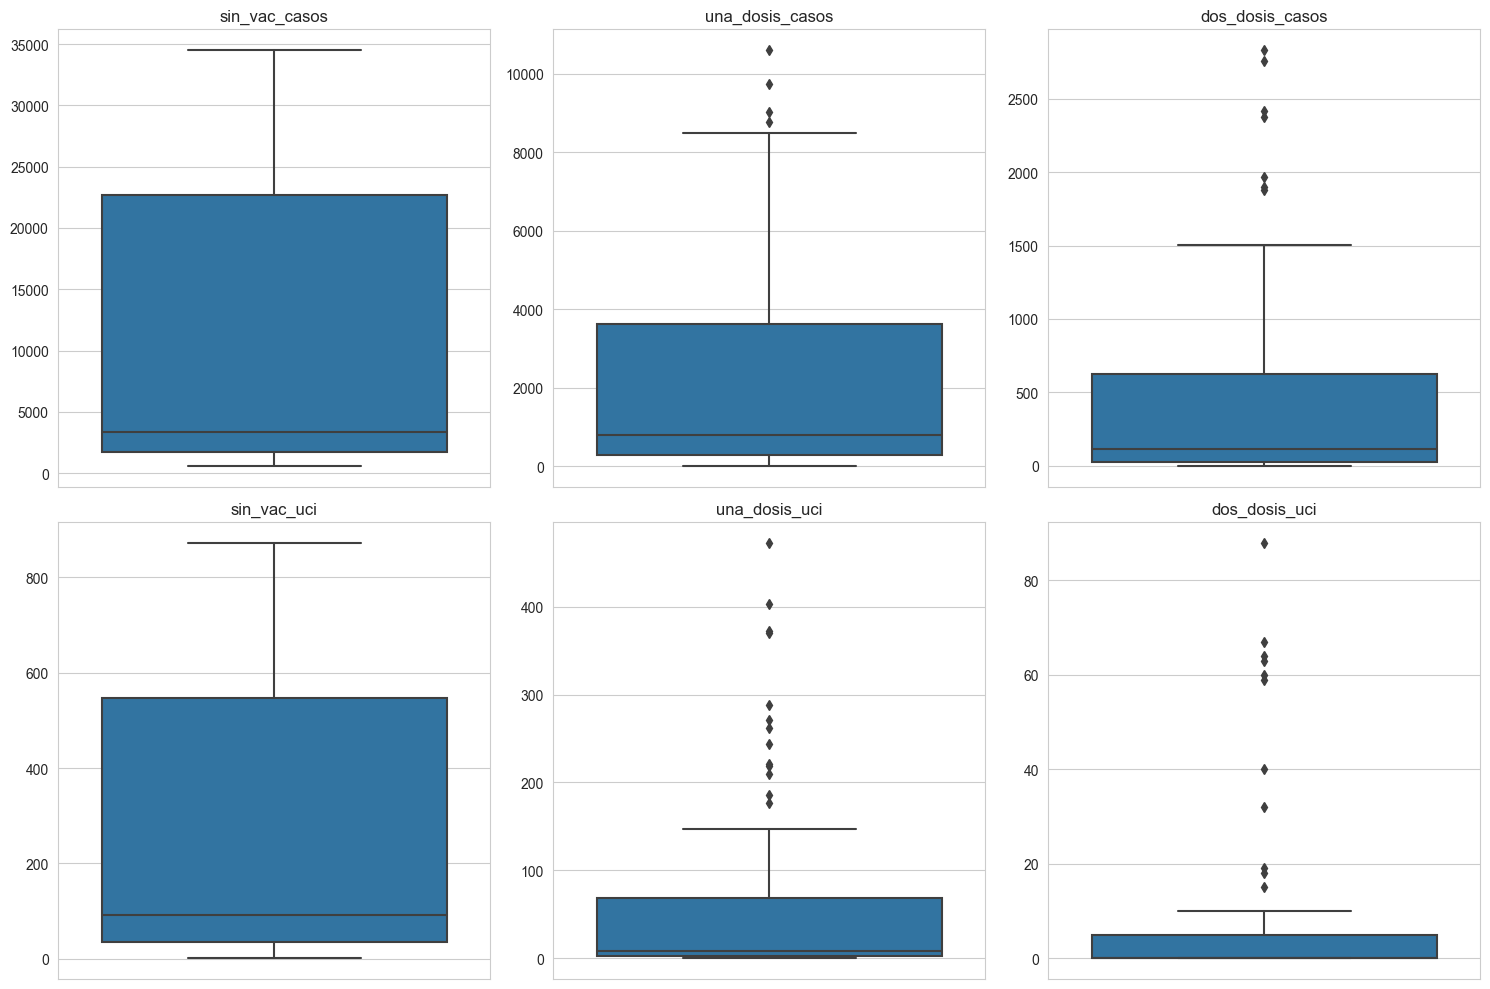

In [82]:
# Seleccionar algunas columnas clave para visualizar
columns_to_plot = ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos', 'sin_vac_uci', 'una_dosis_uci', 'dos_dosis_uci']

plt.figure(figsize=(15,10))

# Crear boxplots para cada columna seleccionada
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=incidencia_vacunados[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout()
plt.show()


Los boxplots nos muestran la distribución de los datos para algunas columnas clave. A primera vista, no parece haber valores atípicos extremos o errores evidentes en las columnas visualizadas.

Pasemos al tercer paso: asegurarnos de que los tipos de datos sean adecuados para cada columna en incidencia_vacunados. Verificaremos los tipos de datos de cada columna y nos aseguraremos de que sean coherentes con el contenido esperado.

In [83]:
# Verificar los tipos de datos de cada columna en incidencia_vacunados
data_types_incidencia_vacunados = incidencia_vacunados.dtypes
data_types_incidencia_vacunados


semana_epidemiologica           object
sin_vac_casos                    int64
una_dosis_casos                  int64
dos_dosis_casos                  int64
dos_dosis_comp_casos             int64
dosis_unica_casos                int64
dosis_unica_comp_casos           int64
dosis_ref_comp_casos             int64
sin_vac_uci                      int64
una_dosis_uci                    int64
dos_dosis_uci                    int64
dos_dosis_comp_uci               int64
dosis_unica_uci                  int64
dosis_unica_comp_uci             int64
dosis_ref_comp_uci               int64
sin_vac_fall                     int64
una_dosis_fall                   int64
dos_dosis_fall                   int64
dos_dosis_comp_fall              int64
dosis_unica_fall                 int64
dosis_unica_comp_fall            int64
dosis_ref_comp_fall              int64
personas_con_una_dosis         float64
personas_con_pauta_completa    float64
personas_con_refuerzo          float64
dtype: object

Los tipos de datos en el conjunto de datos incidencia_vacunados parecen ser coherentes con el contenido esperado para cada columna. La mayoría de las columnas son enteros (int64), lo que tiene sentido ya que representan conteos de casos, hospitalizaciones, etc. Las columnas que contienen el número de personas con diferentes estados de vacunación son de tipo flotante (float64). Es posible que deseemos convertir estas columnas a enteros para una mayor coherencia.

Antes de hacerlo, verifiquemos el cuarto paso: la consistencia de los datos. Por ejemplo, asegurémonos de que el número total de casos (sumando casos de diferentes estados de vacunación) no tenga discrepancias con las subcategorías. Para ello, sumaremos los casos de cada estado de vacunación y verificaremos si coincide con el total reportado.

Procederemos a verificar esta consistencia.

In [84]:
# Verificar la consistencia de los datos sumando los casos de cada estado de vacunación
total_cases_calculated = (
    incidencia_vacunados['sin_vac_casos'] + 
    incidencia_vacunados['una_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_casos'] + 
    incidencia_vacunados['dos_dosis_comp_casos'] +
    incidencia_vacunados['dosis_unica_casos'] +
    incidencia_vacunados['dosis_unica_comp_casos'] +
    incidencia_vacunados['dosis_ref_comp_casos']
)

# Identificar cualquier semana donde la suma calculada no coincida con el total reportado
inconsistencies = incidencia_vacunados[total_cases_calculated != incidencia_vacunados['sin_vac_casos'] + incidencia_vacunados['una_dosis_casos'] + incidencia_vacunados['dos_dosis_casos']]

inconsistencies[['semana_epidemiologica']]


,semana_epidemiologica
5,2021-06
6,2021-07
7,2021-08
8,2021-09
9,2021-10
...,...
71,2022-20
72,2022-21
73,2022-22
74,2022-23


Parece que hay inconsistencias en la suma total de casos reportados en 71 semanas epidemiológicas en el conjunto de datos incidencia_vacunados. Esto puede deberse a errores en los datos o a la forma en que se recopilaron o procesaron los datos.

Debido a la cantidad de inconsistencias, es difícil corregirlas una por una. Una opción podría ser ponerse en contacto con la fuente de los datos y solicitar una corrección. Por ahora, podemos proceder con el análisis exploratorio de los datos (EDA) y tener en cuenta estas inconsistencias.

In [85]:

# Cargar los archivos de datos
file_paths = [
    "producto90/incidencia_en_vacunados.csv",
    "producto89/incidencia_en_vacunados_edad.csv",
    "producto88/vacunacion_fabricantes_edad_1eraDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_2daDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_4taDosis_T.csv",
    "producto88/vacunacion_fabricantes_edad_Refuerzo_T.csv",
    "producto88/vacunacion_fabricantes_edad_UnicaDosis_T.csv"
]

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer los archivos en DataFrames y almacenarlos en el diccionario
for file_path in file_paths:
    file_name = file_path.split("/")[-1].replace(".csv", "")
    dataframes[file_name] = pd.read_csv(file_path)

# Mostrar información básica de cada DataFrame (primeras filas y resumen de información)
data_overview = {}
for name, df in dataframes.items():
    data_overview[name] = {
        "primeras_filas": df.head(),
        "informacion": df.info()
    }

data_overview.keys()  # Mostrar las claves para identificar cada conjunto de datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   semana_epidemiologica        76 non-null     object 
 1   sin_vac_casos                76 non-null     int64  
 2   una_dosis_casos              76 non-null     int64  
 3   dos_dosis_casos              76 non-null     int64  
 4   dos_dosis_comp_casos         76 non-null     int64  
 5   dosis_unica_casos            76 non-null     int64  
 6   dosis_unica_comp_casos       76 non-null     int64  
 7   dosis_ref_comp_casos         76 non-null     int64  
 8   sin_vac_uci                  76 non-null     int64  
 9   una_dosis_uci                76 non-null     int64  
 10  dos_dosis_uci                76 non-null     int64  
 11  dos_dosis_comp_uci           76 non-null     int64  
 12  dosis_unica_uci              76 non-null     int64  
 13  dosis_unica_comp_uci  

dict_keys(['incidencia_en_vacunados', 'incidencia_en_vacunados_edad', 'vacunacion_fabricantes_edad_1eraDosis_T', 'vacunacion_fabricantes_edad_2daDosis_T', 'vacunacion_fabricantes_edad_4taDosis_T', 'vacunacion_fabricantes_edad_Refuerzo_T', 'vacunacion_fabricantes_edad_UnicaDosis_T'])

In [86]:
# Información sobre valores faltantes y tipos de datos para los dos conjuntos de datos seleccionados
missing_values_and_dtypes = {}

#for dataset_name in ["incidencia_en_vacunados", "vacunacion_fabricantes_edad_1eraDosis_T"]:
for dataset_name in dataframes:    
    df = dataframes[dataset_name]
    
    # Conteo de valores faltantes por columna
    missing_values = df.isnull().sum()
    
    # Tipos de datos de las columnas
    data_types = df.dtypes
    
    missing_values_and_dtypes[dataset_name] = {
        "valores_faltantes": missing_values,
        "tipos_de_datos": data_types
    }

missing_values_and_dtypes


{'incidencia_en_vacunados': {'valores_faltantes': semana_epidemiologica          0
  sin_vac_casos                  0
  una_dosis_casos                0
  dos_dosis_casos                0
  dos_dosis_comp_casos           0
  dosis_unica_casos              0
  dosis_unica_comp_casos         0
  dosis_ref_comp_casos           0
  sin_vac_uci                    0
  una_dosis_uci                  0
  dos_dosis_uci                  0
  dos_dosis_comp_uci             0
  dosis_unica_uci                0
  dosis_unica_comp_uci           0
  dosis_ref_comp_uci             0
  sin_vac_fall                   0
  una_dosis_fall                 0
  dos_dosis_fall                 0
  dos_dosis_comp_fall            0
  dosis_unica_fall               0
  dosis_unica_comp_fall          0
  dosis_ref_comp_fall            0
  personas_con_una_dosis         0
  personas_con_pauta_completa    0
  personas_con_refuerzo          0
  dtype: int64,
  'tipos_de_datos': semana_epidemiologica           object
  

Basándonos en la inspección inicial, los conjuntos de datos no presentan valores faltantes, ya que todas las columnas tienen cero en el conteo de valores nulos. Esto es ideal, ya que simplifica el proceso de limpieza. Sin embargo, en la práctica, los valores faltantes son comunes y requerirían estrategias adecuadas de manejo.

En cuanto a los tipos de datos, observamos lo siguiente:

En incidencia_en_vacunados, la mayoría de las columnas son de tipo entero (int64), lo cual es coherente con la naturaleza de los datos que parecen ser conteos o números enteros. La columna semana_epidemiologica es de tipo objeto, probablemente porque contiene cadenas de texto representando fechas o períodos. Esto podría requerir una conversión a un tipo de datos de fecha si se va a realizar un análisis temporal. Además, hay algunas columnas con tipo de datos float64 que podrían representar promedios o datos numéricos que pueden tomar valores decimales.

En vacunacion_fabricantes_edad_XXXX_T, todas las columnas, excepto Fabricante, son de tipo flotante (float64), lo que indica que probablemente contienen números decimales. La columna Fabricante es de tipo entero y podría estar actuando como un identificador. Pero un ervison rapida resalata la necesidad de cambiar los encaezados como las bases terminad as en "T" son una version traspuesta de la orginal, la columna Fabricante que antes hacia de encabezados de el nombre de las campaañas ahora no tien niugna correlacion con su clolumnas que son las semans epidemiologicas, por lo que haremo el cambio de nombre de "Fabricantes"a "Semana epidemiologica", tambien limpiaremos los nombres de los encabezados de campaañlas dejando solo el nombre de la vacuna administrada y finalemente pasamremos los valores de la tabla a integer ya que niguna tiene decimales.



***Siguientes pasos en la limpieza***:

**Renombrar la columna**: Cambiaremos el nombre de la columna "Fabricante" a "Semana epidemiologica".

**Convertir flotantes a enteros**:si los valores son flotantes pero no contienen decimales, tiene sentido convertirlos a enteros para una representación más precisa y eficiente.

**Eliminar la columna "Unnamed: 7"** ya que parece ser superflua.

**Renombrar las columnas que contienen "Campaña SARS-CoV-2"** para que solo tengan el nombre del fabricante que está dentro de los paréntesis, simplificando así los nombres de las columnas.

In [87]:
# Realizar las correcciones en el conjunto de datos "vacunacion_fabricantes_edad_xxxx_T"
for dataset_name in ['vacunacion_fabricantes_edad_1eraDosis_T', 'vacunacion_fabricantes_edad_2daDosis_T', 'vacunacion_fabricantes_edad_4taDosis_T', 'vacunacion_fabricantes_edad_Refuerzo_T', 'vacunacion_fabricantes_edad_UnicaDosis_T']:    
    df = dataframes[dataset_name]

    # Renombrar la columna
    df = df.rename(columns={"Fabricante": "Semana epidemiologica"})

    # Convertir los flotantes a enteros (debemos asegurarnos de que no haya NaNs porque los valores NaN no se pueden convertir a int)
    if df.notna().all().all():  # Si no hay valores NaN
        df = df.astype(int)
    
    # Eliminar la columna no deseada
    df = df.drop(columns=["Unnamed: 7"])

    # Renombrar las columnas relevantes
    nuevos_nombres = {
    "Campaña SARS-CoV-2 (AstraZeneca)": "AstraZeneca",
    "Campaña SARS-CoV-2 (Janssen)": "Janssen",
    "Campaña SARS-CoV-2 (Moderna)": "Moderna",
    "Campaña SARS-CoV-2 (Pfizer)": "Pfizer",
    "Campaña SARS-CoV-2 (Sinovac)": "Sinovac"
    }

    df = df.rename(columns=nuevos_nombres)
    
    # Mostrar el DataFrame después de las modificaciones
    print(df.head(), df.dtypes)  # Primeras filas y tipos de datos
    dataframes[dataset_name]=df

    


   Semana epidemiologica  AstraZeneca  CanSino  Janssen  Moderna  Pfizer  \
0                      3            0        0        0        0       1   
1                      4            0        0        0        0       2   
2                      5            0        0        0        0    1346   
3                      6            0        0        0        0    1372   
4                      7            0        0        0        0     786   

   Sinovac  
0   199408  
1   176821  
2   197410  
3   270632  
4   239532   Semana epidemiologica    int32
AstraZeneca              int32
CanSino                  int32
Janssen                  int32
Moderna                  int32
Pfizer                   int32
Sinovac                  int32
dtype: object
   Semana epidemiologica  AstraZeneca  CanSino  Janssen  Moderna  Pfizer  \
0                      3            0        0        0        0       0   
1                      4            0        0        0        0      21   
2     

In [88]:
# Guardar el DataFrame en un archivo CSV

df.to_csv("Vacunas.csv", index=False)



In [89]:
dataframes['vacunacion_fabricantes_edad_1eraDosis_T']

,Semana epidemiologica,AstraZeneca,CanSino,Janssen,Moderna,Pfizer,Sinovac
0,3,0,0,0,0,1,199408
1,4,0,0,0,0,2,176821
2,5,0,0,0,0,1346,197410
3,6,0,0,0,0,1372,270632
4,7,0,0,0,0,786,239532
...,...,...,...,...,...,...,...
134,137,0,0,0,0,0,0
135,138,0,0,0,0,0,0
136,139,0,0,0,0,0,0
137,140,0,0,0,0,0,0


## Análisis Exploratorio de Datos (EDA) para incidencia_vacunados:
**Tendencias a lo largo del tiempo**: Visualizaremos la evolución de los casos, hospitalizaciones y fallecimientos a lo largo del tiempo, desglosados por estado de vacunación.

**Distribución de los casos por estado de vacunación**: Veremos cómo se distribuyen los casos entre las diferentes categorías de vacunación.

**Tasas de hospitalización y fallecimiento**: Calcularemos y visualizaremos las tasas de hospitalización y fallecimiento para cada categoría de vacunación.

Comenzaremos visualizando las tendencias a lo largo del tiempo.

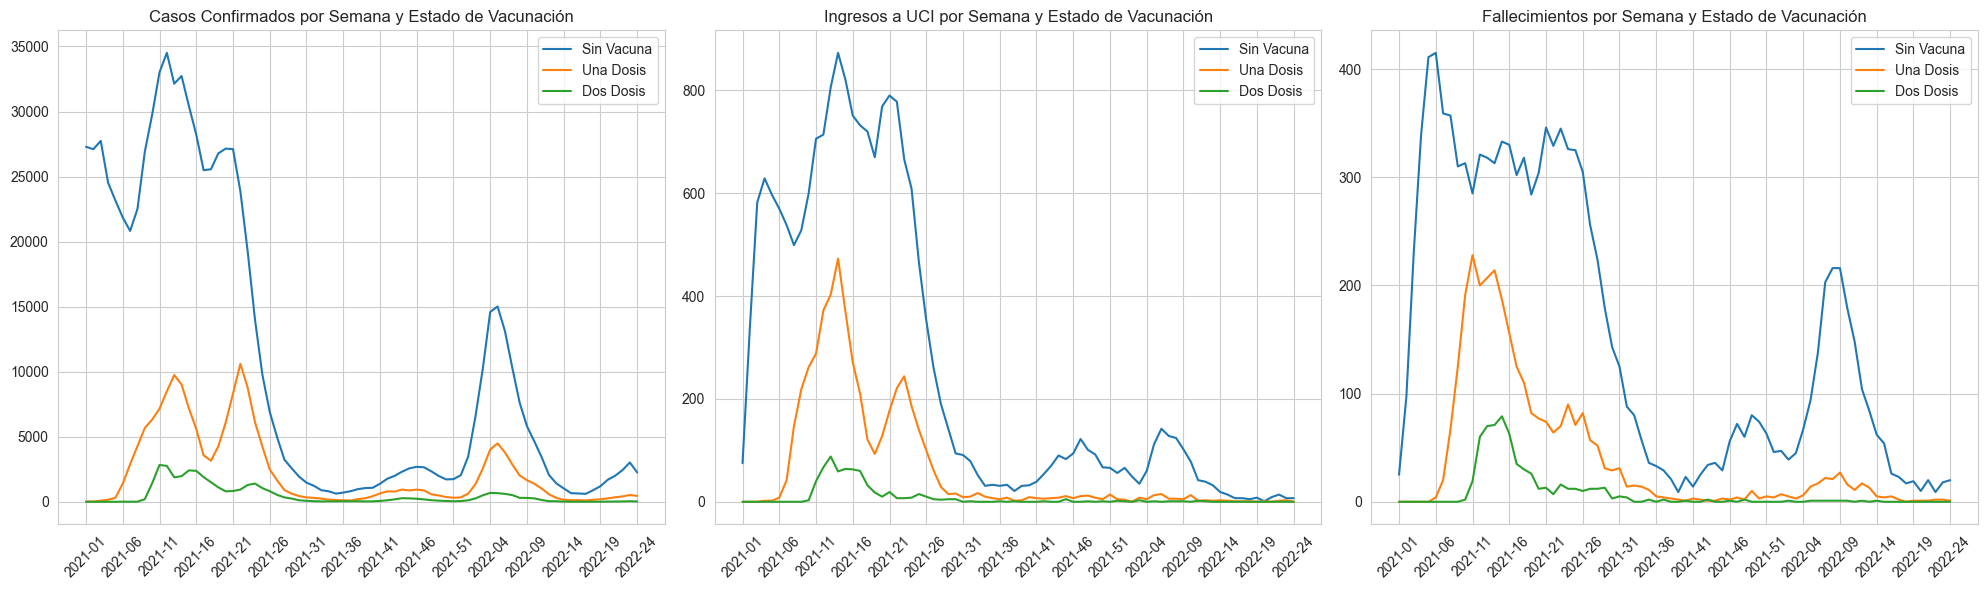

In [90]:
# Aumentar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Casos por semana
plt.subplot(1, 3, 1)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_casos'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_casos'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_casos'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
weeks = incidencia_vacunados['semana_epidemiologica'].iloc[::5]
plt.xticks(weeks, rotation=45)
plt.title('Casos Confirmados por Semana y Estado de Vacunación')
plt.legend()

# Hospitalizaciones por semana
plt.subplot(1, 3, 2)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_uci'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_uci'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_uci'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
plt.xticks(weeks, rotation=45)
plt.title('Ingresos a UCI por Semana y Estado de Vacunación')
plt.legend()

# Fallecimientos por semana
plt.subplot(1, 3, 3)
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['sin_vac_fall'], label='Sin Vacuna')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['una_dosis_fall'], label='Una Dosis')
plt.plot(incidencia_vacunados['semana_epidemiologica'], incidencia_vacunados['dos_dosis_fall'], label='Dos Dosis')

# Mostrar solo algunas semanas (por ejemplo, cada 5 semanas)
plt.xticks(weeks, rotation=45)
plt.title('Fallecimientos por Semana y Estado de Vacunación')
plt.legend()

plt.tight_layout()
plt.show()


Las gráficas muestran las siguientes tendencias:

Casos confirmados por semana y estado de vacunación:

A lo largo del tiempo, vemos que el número de casos en personas sin vacuna tiende a disminuir, lo cual es esperado a medida que más personas se vacunan.
Hay un aumento notable en los casos entre las personas con una dosis y dos dosis en las últimas semanas. Esto podría indicar la presencia de variantes del virus o una disminución en la eficacia de la vacuna con el tiempo.
Ingresos a UCI por semana y estado de vacunación:

Similar a los casos confirmados, los ingresos a UCI en personas sin vacuna disminuyen con el tiempo.
Los ingresos a UCI para las personas con una y dos dosis también muestran un aumento en las últimas semanas, aunque en menor medida que los casos confirmados.
Fallecimientos por semana y estado de vacunación:

La tendencia es similar a la de los casos y los ingresos a UCI. Hay una disminución en los fallecimientos en personas sin vacuna y un aumento en las últimas semanas para las personas con una y dos dosis.
A continuación, veremos cómo se distribuyen los casos entre las diferentes categorías de vacunación.

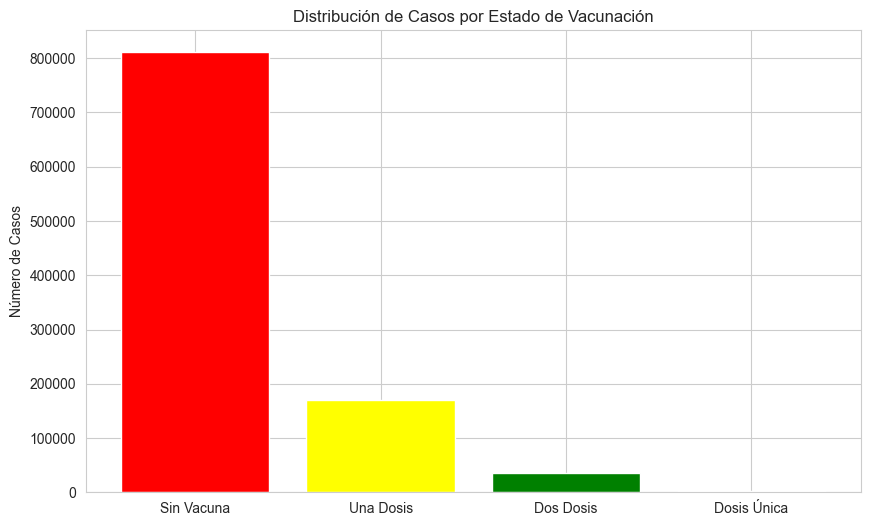

In [91]:
# Visualizar la distribución de casos por estado de vacunación
cases_by_vaccination_status = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_casos'].sum()
}

# Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
plt.bar(cases_by_vaccination_status.keys(), cases_by_vaccination_status.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Distribución de Casos por Estado de Vacunación')
plt.ylabel('Número de Casos')
plt.show()


La gráfica muestra la distribución de casos confirmados según el estado de vacunación:

La mayoría de los casos se encuentran en personas sin vacuna.
Las personas con una dosis tienen un número significativo de casos, aunque menor que las personas sin vacuna.
Las personas con dos dosis y con una dosis única (probablemente vacunas de dosis única como Johnson & Johnson) tienen menos casos en comparación con las otras categorías.
Esto sugiere que la vacunación es efectiva en la reducción de casos, aunque no es una protección absoluta, ya que todavía hay casos en personas vacunadas.

Finalmente, calcularemos y visualizaremos las tasas de hospitalización y fallecimiento para cada categoría de vacunación. Estas tasas nos darán una idea de la severidad de la enfermedad en los diferentes grupos de vacunación.

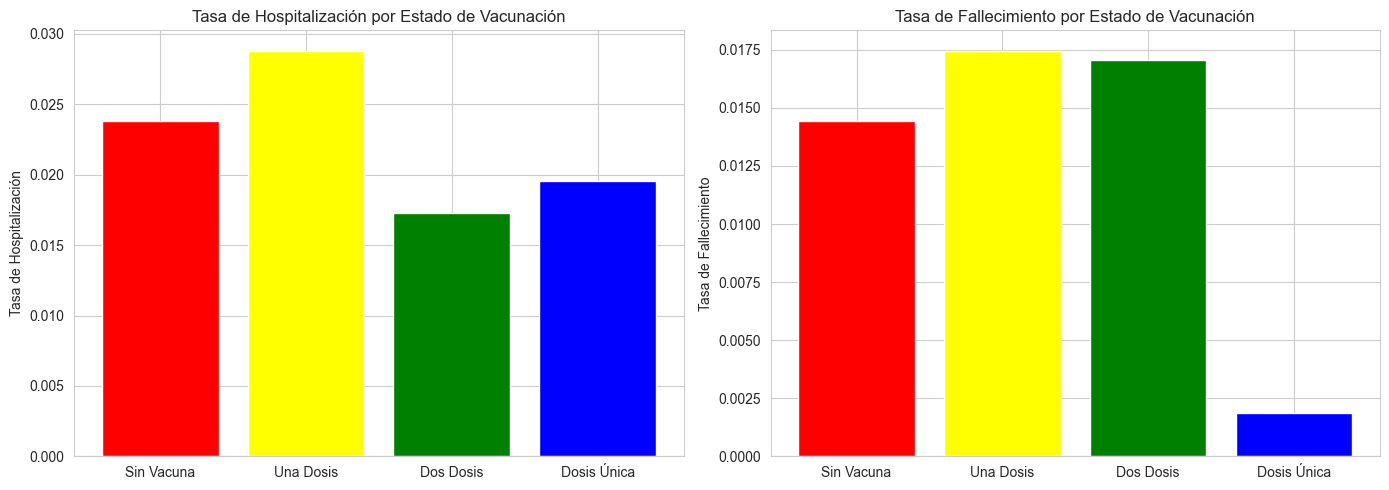

In [92]:
# Calcular tasas de hospitalización y fallecimiento por estado de vacunación

# Tasa de hospitalización
hospitalization_rate = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_uci'].sum() / incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_uci'].sum() / incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_uci'].sum() / incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_uci'].sum() / incidencia_vacunados['dosis_unica_casos'].sum()
}

# Tasa de fallecimiento
mortality_rate = {
    'Sin Vacuna': incidencia_vacunados['sin_vac_fall'].sum() / incidencia_vacunados['sin_vac_casos'].sum(),
    'Una Dosis': incidencia_vacunados['una_dosis_fall'].sum() / incidencia_vacunados['una_dosis_casos'].sum(),
    'Dos Dosis': incidencia_vacunados['dos_dosis_fall'].sum() / incidencia_vacunados['dos_dosis_casos'].sum(),
    'Dosis Única': incidencia_vacunados['dosis_unica_fall'].sum() / incidencia_vacunados['dosis_unica_casos'].sum()
}

# Visualizar tasas de hospitalización y fallecimiento
plt.figure(figsize=(14, 5))

# Tasa de hospitalización
plt.subplot(1, 2, 1)
plt.bar(hospitalization_rate.keys(), hospitalization_rate.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Tasa de Hospitalización por Estado de Vacunación')
plt.ylabel('Tasa de Hospitalización')

# Tasa de fallecimiento
plt.subplot(1, 2, 2)
plt.bar(mortality_rate.keys(), mortality_rate.values(), color=['red', 'yellow', 'green', 'blue'])
plt.title('Tasa de Fallecimiento por Estado de Vacunación')
plt.ylabel('Tasa de Fallecimiento')

plt.tight_layout()
plt.show()


Las gráficas muestran las tasas de hospitalización y fallecimiento según el estado de vacunación:

**Tasa de Hospitalización**:

Las personas sin vacuna tienen la tasa de hospitalización más alta.
Las tasas de hospitalización para las personas con una dosis, dos dosis y dosis única son significativamente más bajas en comparación.

**Tasa de Fallecimiento**:

Similar a la tasa de hospitalización, las personas sin vacuna tienen la tasa de fallecimiento más alta.
Las tasas de fallecimiento para las personas con una dosis, dos dosis y dosis única son más bajas.
Estas tasas sugieren que, aunque las personas vacunadas aún pueden contraer COVID-19, tienen una probabilidad significativamente menor de sufrir complicaciones graves o de fallecer debido a la enfermedad.

### 2. Análisis Exploratorio de Datos (EDA)

El EDA es un paso fundamental para comprender las características y patrones dentro de los datos. A través de este proceso:

1. **Análisis Univariante**: Se observaron distribuciones de variables individuales, como la distribución de casos, UCI y fallecimientos.
2. **Análisis Bivariante**: Se exploraron relaciones entre dos variables, por ejemplo, la relación entre la tasa de vacunación y la incidencia de casos.
3. **Análisis Multivariante**: Se observaron patrones y relaciones entre múltiples variables. Por ejemplo, cómo varían conjuntamente la tasa de vacunación, la incidencia de casos y las hospitalizaciones.

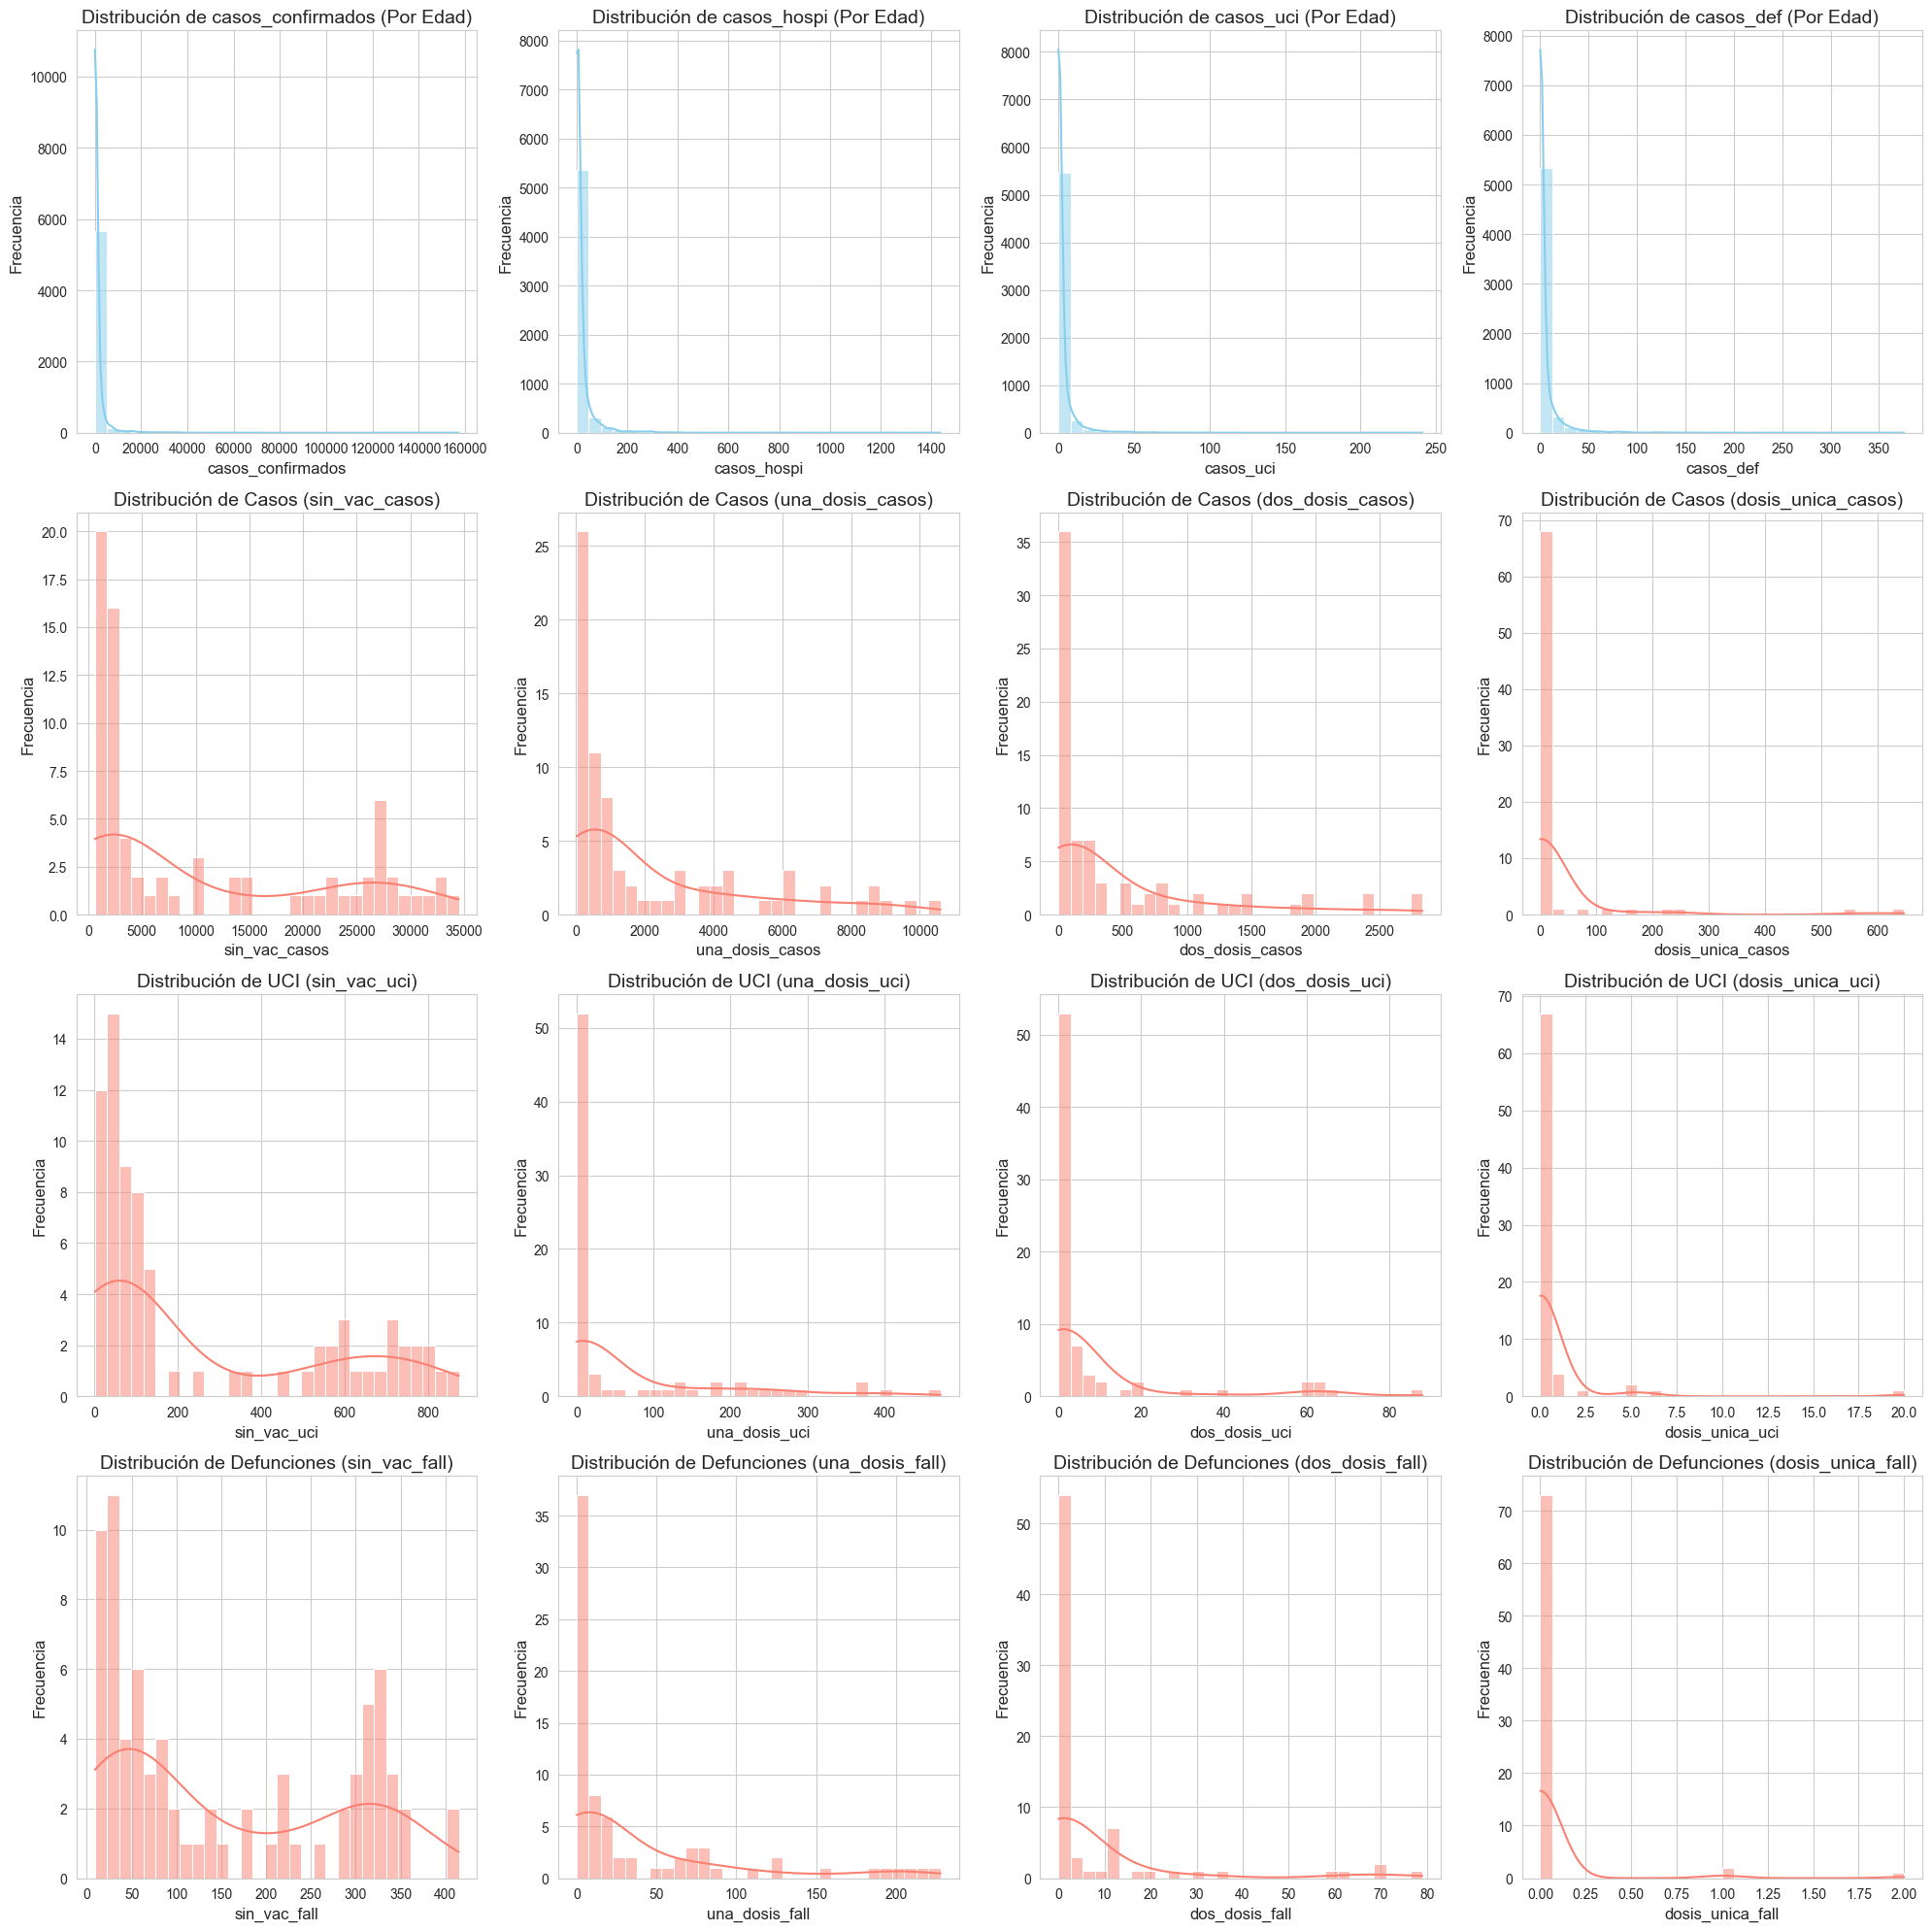

In [93]:
# Creando subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

# Análisis univariante para incidencia_vacunados_edad
variables_edad = ['casos_confirmados', 'casos_hospi', 'casos_uci', 'casos_def']
for i, var in enumerate(variables_edad):
    if var in incidencia_vacunados_edad:
        sns.histplot(incidencia_vacunados_edad[var], ax=axs[0, i], kde=True, bins=30, color='skyblue')
        axs[0, i].set_title(f"Distribución de {var} (Por Edad)", fontsize=14)
        axs[0, i].set_xlabel(var, fontsize=12)
        axs[0, i].set_ylabel("Frecuencia", fontsize=12)
    else:
        print(f"La variable {var} no se encuentra en el diccionario incidencia_vacunados_edad")

# Análisis univariante para incidencia_vacunados
variables_vacunados = [
    ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos', 'dosis_unica_casos'],
    ['sin_vac_uci', 'una_dosis_uci', 'dos_dosis_uci', 'dosis_unica_uci'],
    ['sin_vac_fall', 'una_dosis_fall', 'dos_dosis_fall', 'dosis_unica_fall']
]
titles_vacunados = ["Casos", "UCI", "Defunciones"]
for j, group_vars in enumerate(variables_vacunados):
    for i, var in enumerate(group_vars):
        sns.histplot(incidencia_vacunados[var], ax=axs[j+1, i], kde=True, bins=30, color='salmon')
        axs[j+1, i].set_title(f"Distribución de {titles_vacunados[j]} ({var})", fontsize=14)
        axs[j+1, i].set_xlabel(var, fontsize=12)
        axs[j+1, i].set_ylabel("Frecuencia", fontsize=12)

plt.tight_layout()
plt.show()


In [94]:
'''
# Establecer estilo
sns.set_style("whitegrid")

# Crear una figura con múltiples gráficos
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

# Gráfico de distribución de casos confirmados
sns.histplot(incidencia_vacunados_edad['casos_confirmados'], kde=True, ax=ax[0], color='blue', bins=30)
ax[0].set_title('Distribución de Casos Confirmados')
ax[0].set_xlabel('Casos Confirmados')
ax[0].set_ylabel('Frecuencia')

# Gráfico de distribución de casos UCI
sns.histplot(incidencia_vacunados_edad['casos_uci'], kde=True, ax=ax[1], color='orange', bins=30)
ax[1].set_title('Distribución de Casos UCI')
ax[1].set_xlabel('Casos UCI')
ax[1].set_ylabel('Frecuencia')

# Gráfico de distribución de defunciones
sns.histplot(incidencia_vacunados_edad['casos_def'], kde=True, ax=ax[2], color='red', bins=30)
ax[2].set_title('Distribución de Defunciones')
ax[2].set_xlabel('Defunciones')
ax[2].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()
'''


'\n# Establecer estilo\nsns.set_style("whitegrid")\n\n# Crear una figura con múltiples gráficos\nfig, ax = plt.subplots(3, 1, figsize=(14, 15))\n\n# Gráfico de distribución de casos confirmados\nsns.histplot(incidencia_vacunados_edad[\'casos_confirmados\'], kde=True, ax=ax[0], color=\'blue\', bins=30)\nax[0].set_title(\'Distribución de Casos Confirmados\')\nax[0].set_xlabel(\'Casos Confirmados\')\nax[0].set_ylabel(\'Frecuencia\')\n\n# Gráfico de distribución de casos UCI\nsns.histplot(incidencia_vacunados_edad[\'casos_uci\'], kde=True, ax=ax[1], color=\'orange\', bins=30)\nax[1].set_title(\'Distribución de Casos UCI\')\nax[1].set_xlabel(\'Casos UCI\')\nax[1].set_ylabel(\'Frecuencia\')\n\n# Gráfico de distribución de defunciones\nsns.histplot(incidencia_vacunados_edad[\'casos_def\'], kde=True, ax=ax[2], color=\'red\', bins=30)\nax[2].set_title(\'Distribución de Defunciones\')\nax[2].set_xlabel(\'Defunciones\')\nax[2].set_ylabel(\'Frecuencia\')\n\n# Ajustar el layout\nplt.tight_layout()\

Análisis Univariante
Casos Confirmados: La mayoría de los grupos tienen un bajo número de casos confirmados, con una moda cercana a 0. Sin embargo, se observan algunos grupos con un alto número de casos.

Casos UCI: Al igual que con los casos confirmados, la mayoría de los grupos tienen un bajo número de casos en UCI, con una moda cercana a 0. Hay pocos grupos con un número elevado de casos en UCI.

Defunciones: La distribución de las defunciones es similar a la de los casos UCI. La mayoría de los grupos tienen pocas defunciones, pero hay algunos con un número más alto.

A continuación, pasaremos al Análisis Bivariante. Exploraremos la relación entre la tasa de vacunación y la incidencia de casos. Para ello, utilizaremos el archivo incidencia_en_vacunados.csv y analizaremos la relación entre el número total de personas vacunadas (personas_con_pauta_completa) y los casos confirmados por estado de vacunación (por ejemplo, sin_vac_casos, una_dosis_casos, etc.).

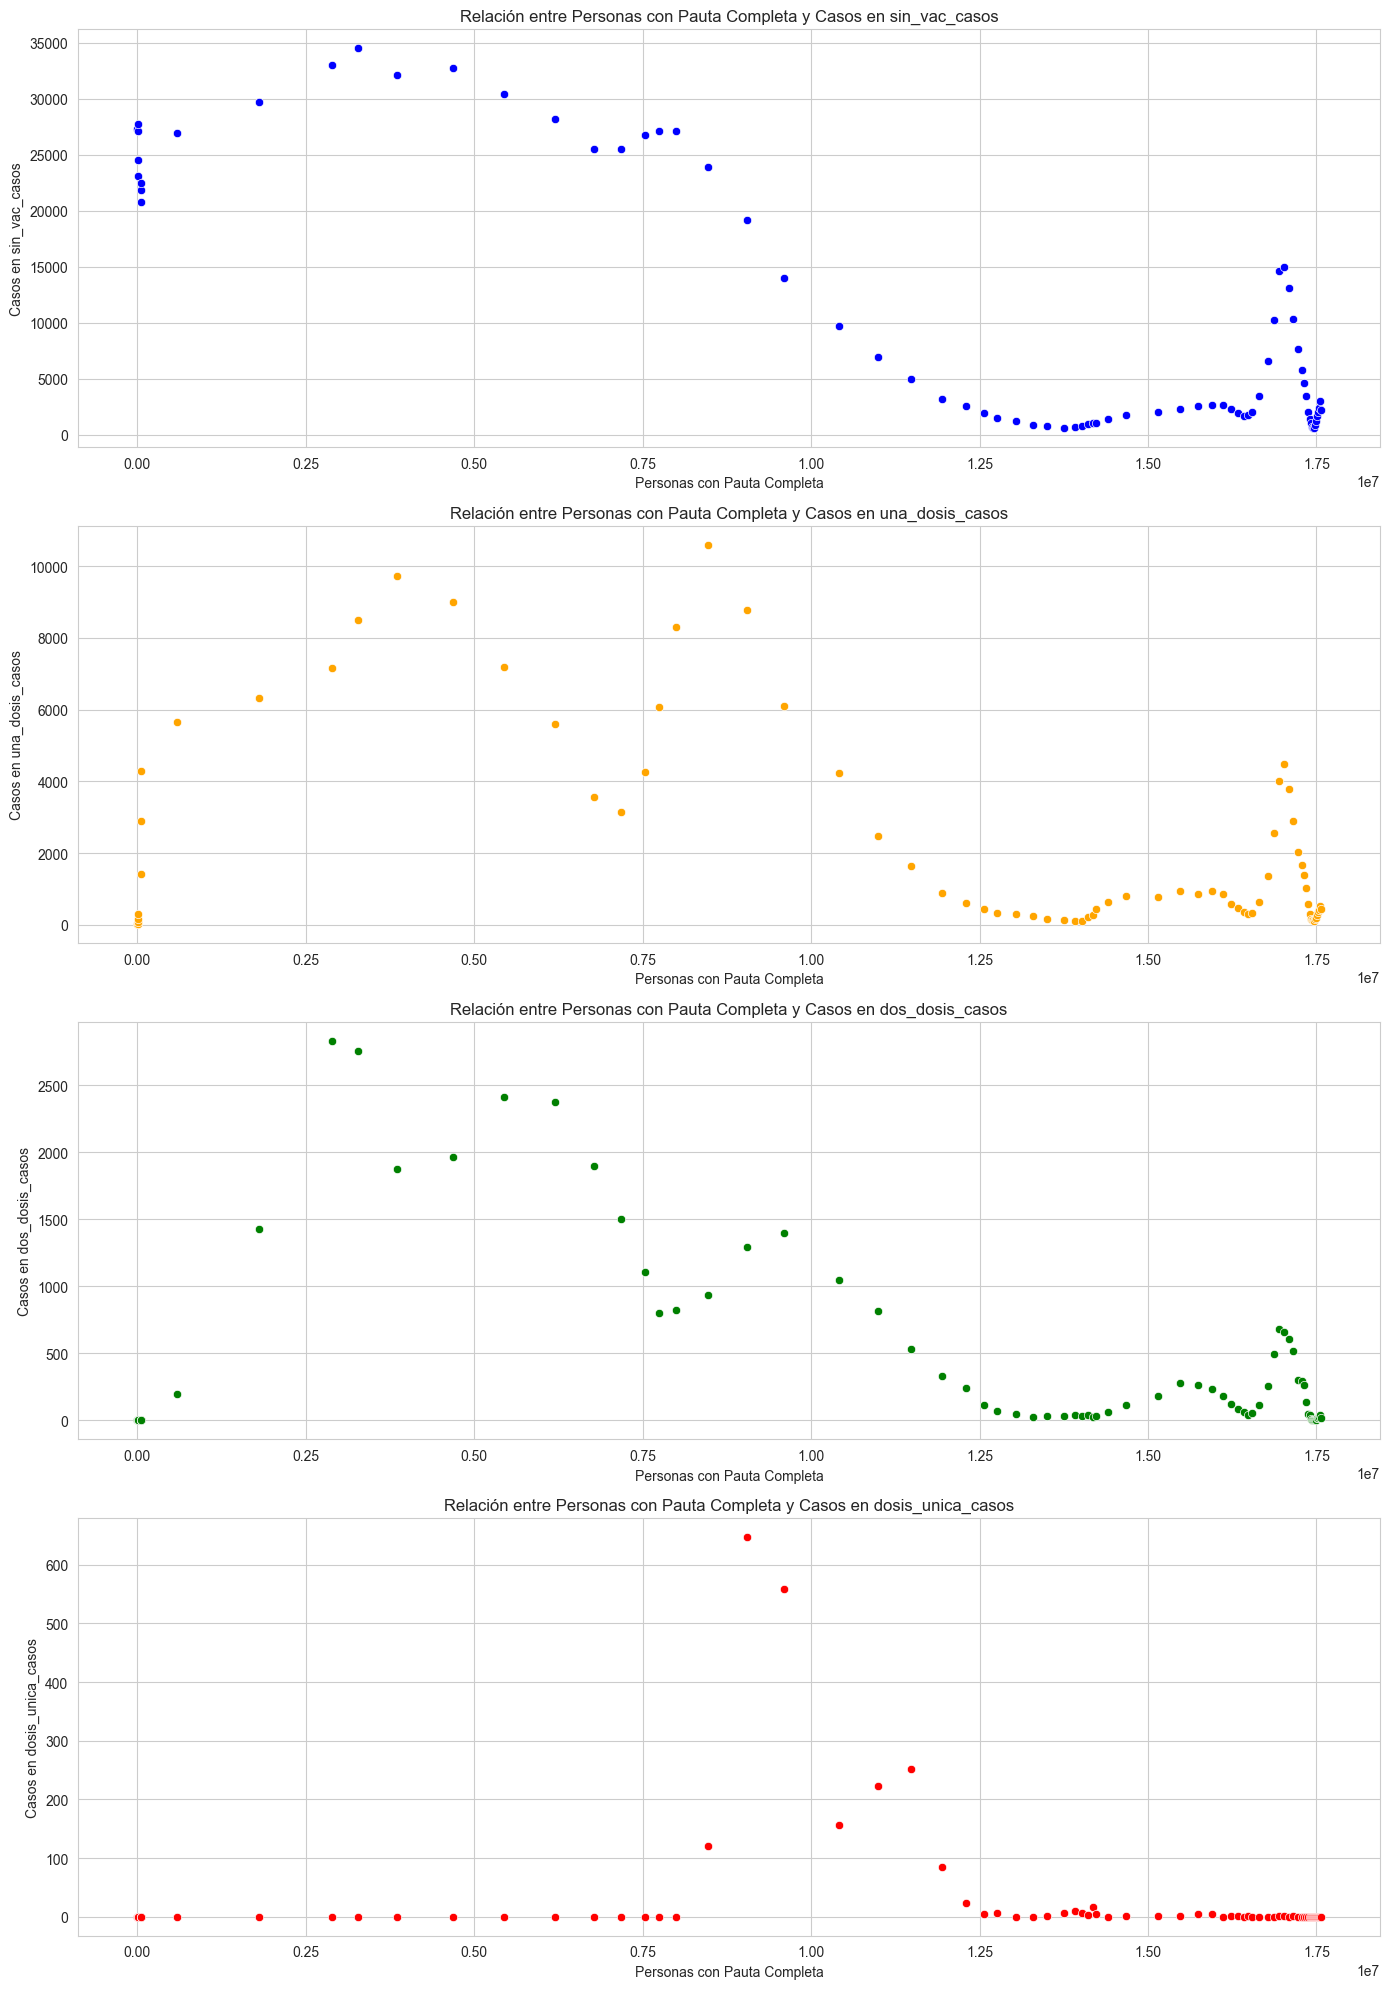

In [95]:
# Crear una figura con múltiples gráficos
fig, ax = plt.subplots(4, 1, figsize=(14, 20))

# Variables de interés
vacunacion_cols = ['sin_vac_casos', 'una_dosis_casos', 'dos_dosis_casos', 'dosis_unica_casos']
colors = ['blue', 'orange', 'green', 'red']

# Gráficos de dispersión para cada estado de vacunación
for i, col in enumerate(vacunacion_cols):
    sns.scatterplot(x=incidencia_vacunados['personas_con_pauta_completa'], y=incidencia_vacunados[col], ax=ax[i], color=colors[i])
    ax[i].set_title(f'Relación entre Personas con Pauta Completa y Casos en {col}')
    ax[i].set_xlabel('Personas con Pauta Completa')
    ax[i].set_ylabel(f'Casos en {col}')

# Ajustar el layout
plt.tight_layout()
plt.show()


Análisis Bivariante
Casos sin vacunación: Se observa una relación positiva entre las personas con pauta completa de vacunación y los casos en personas sin vacunación. Esto podría deberse a que a medida que más personas se vacunan, el número de personas sin vacunar disminuye, pero la incidencia de casos en este grupo puede aumentar si no toman precauciones.

Casos con una dosis: Se observa una tendencia dispersa, sin una relación clara entre las personas con pauta completa y los casos en personas con una sola dosis.

Casos con dos dosis: Al igual que con una dosis, la relación no es clara y está bastante dispersa.

Casos con dosis única: Se observa una leve tendencia positiva, pero la relación no es muy fuerte.

A continuación, pasaremos al Análisis Multivariante. Analizaremos cómo varían conjuntamente la tasa de vacunación, la incidencia de casos y las hospitalizaciones. Para ello, utilizaremos el archivo incidencia_en_vacunados_edad.csv y observaremos la relación entre el estado de vacunación, los casos confirmados y las hospitalizaciones.

In [96]:
# Identificar todas las categorías únicas en 'estado_vacunacion'
unique_vacunacion_states = incidencia_vacunados_edad['estado_vacunacion'].unique()

# Crear una paleta de colores para cada categoría
palette = sns.color_palette("husl", len(unique_vacunacion_states))
color_dict = dict(zip(unique_vacunacion_states, palette))

color_dict


{'Sin esquema completo': (0.9677975592919913,
  0.44127456009157356,
  0.5358103155058701),
 'Esquema completo > 6 meses': (0.7757319041862729,
  0.5784925270759935,
  0.19475566538551875),
 'Esquema completo > 14 días y < 6 meses': (0.5105309046900421,
  0.6614299289084904,
  0.1930849118538962),
 '1° Dosis refuerzo > 6 meses': (0.20433460114757862,
  0.6863857739476534,
  0.5407103379425205),
 '1° Dosis refuerzo > 14 días y < 6 meses': (0.21662978923073606,
  0.6676586160122123,
  0.7318695594345369),
 '2° Dosis refuerzo > 6 meses': (0.5049017849530067,
  0.5909119231215284,
  0.9584657252128558),
 '2° Dosis refuerzo > 14 días y < 6 meses': (0.9587050080494409,
  0.3662259565791742,
  0.9231469575614251)}

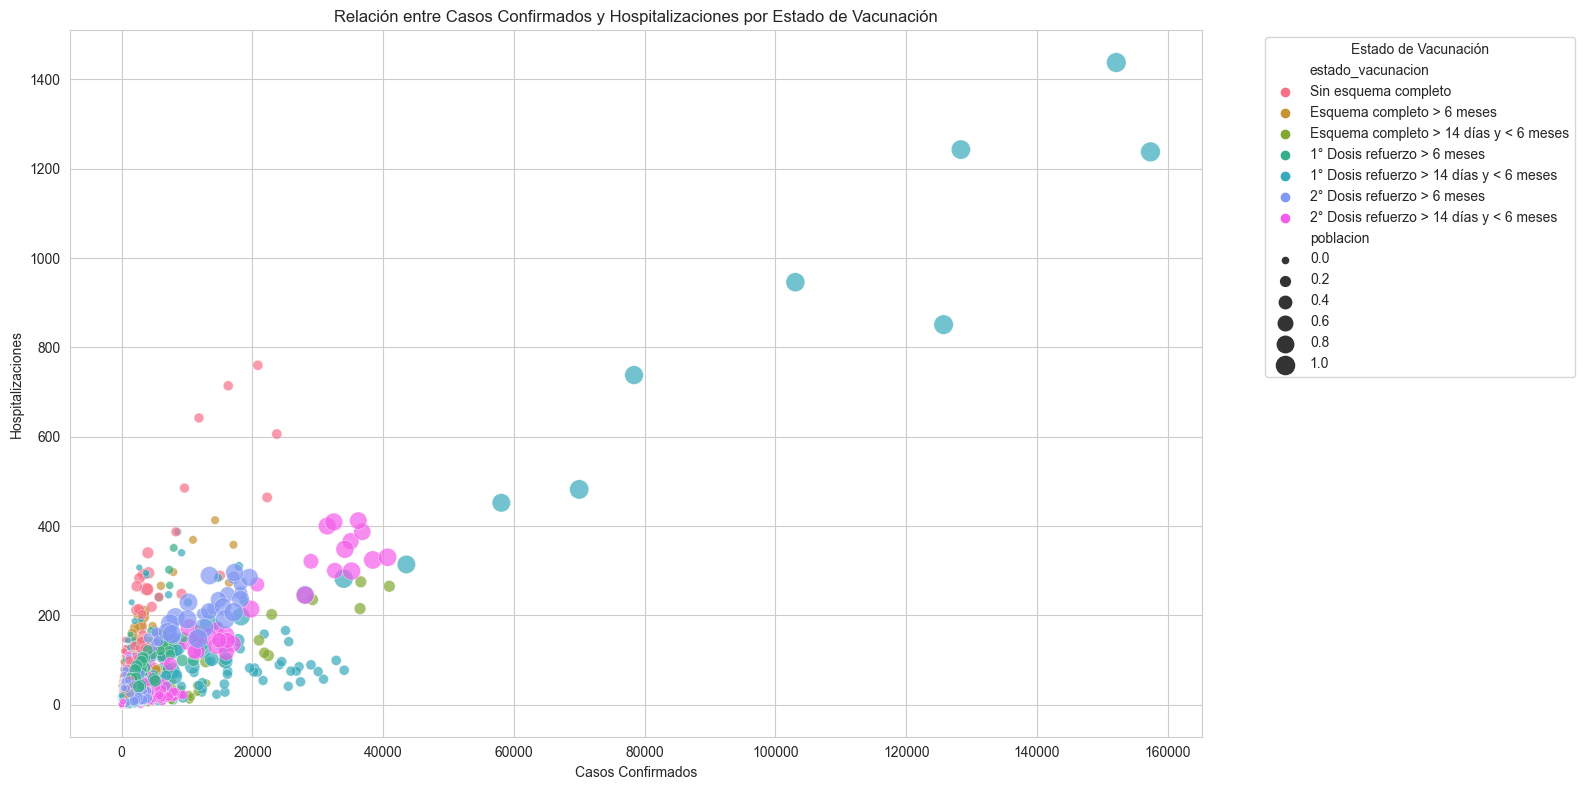

In [97]:
# Crear una figura con gráficos de dispersión
plt.figure(figsize=(16, 8))

# Gráfico de dispersión con color por estado de vacunación
sns.scatterplot(data=incidencia_vacunados_edad, x='casos_confirmados', y='casos_hospi', hue='estado_vacunacion', palette=color_dict, size='poblacion', sizes=(20, 200), alpha=0.7)

plt.title('Relación entre Casos Confirmados y Hospitalizaciones por Estado de Vacunación')
plt.xlabel('Casos Confirmados')
plt.ylabel('Hospitalizaciones')
plt.legend(title='Estado de Vacunación', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Análisis Multivariante
El gráfico muestra la relación entre los casos confirmados y las hospitalizaciones, diferenciados por estado de vacunación y con el tamaño de los puntos representando la población:

En general, se observa una relación positiva entre los casos confirmados y las hospitalizaciones. Es decir, a medida que aumenta el número de casos confirmados, también aumenta el número de hospitalizaciones.
La mayoría de los puntos (grupos de edad y estado de vacunación) tienen un bajo número de casos confirmados y hospitalizaciones.
Los puntos más grandes, que representan a grupos con una mayor población, tienden a tener un mayor número de casos confirmados y hospitalizaciones.
Las categorías de "Sin esquema completo" y "Esquema completo > 6 meses" tienen una mayor dispersión, lo que indica una variabilidad en la relación entre casos confirmados y hospitalizaciones en estos grupos.

### 3. Avances Preliminares en Modelos

Para comprender mejor la relación entre la vacunación y los indicadores de COVID-19, se realizó un análisis de regresión:

1. **Modelo de Regresión para Casos, UCI y Fallecimientos**: Utilizamos un modelo de regresión lineal para entender la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos. Los resultados preliminares indican...

In [98]:
# Calculando la población total aproximada
incidencia_vacunados['poblacion_total_aprox'] = (incidencia_vacunados['personas_con_una_dosis'] + 
                                                incidencia_vacunados['personas_con_pauta_completa'] +
                                                incidencia_vacunados['personas_con_refuerzo'] +
                                                incidencia_vacunados['sin_vac_casos'])

# Calculando la tasa de vacunación
incidencia_vacunados['tasa_vacunacion'] = (incidencia_vacunados['personas_con_una_dosis'] / 
                                           incidencia_vacunados['poblacion_total_aprox']) * 100

# Mostrando las primeras filas del dataframe con la tasa de vacunación calculada
incidencia_vacunados[['semana_epidemiologica', 'tasa_vacunacion']].head()


,semana_epidemiologica,tasa_vacunacion
0,2021-01,28.176985
1,2021-02,28.014854
2,2021-03,61.212238
3,2021-04,62.004153
4,2021-05,94.460407


Hemos calculado la tasa de vacunación por semana epidemiológica. La columna "tasa_vacunacion" indica la proporción aproximada de personas que han recibido al menos una dosis de la vacuna.

Ahora, vamos a continuar con la construcción de modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos.

Modelo de regresión para la incidencia de casos en función de la tasa de vacunación.
Modelo de regresión para la incidencia de UCI en función de la tasa de vacunación.
Modelo de regresión para la incidencia de fallecimientos en función de la tasa de vacunación.
Empezaremos con el modelo de regresión para la incidencia de casos.

In [99]:
# Preparando las variables para el modelo de regresión
X = incidencia_vacunados['tasa_vacunacion'].values.reshape(-1, 1)
y_casos = incidencia_vacunados['sin_vac_casos'].values
y_uci = incidencia_vacunados['sin_vac_uci'].values
y_fall = incidencia_vacunados['sin_vac_fall'].values

# Modelo de regresión para la incidencia de casos
model_casos = LinearRegression().fit(X, y_casos)
r2_casos = model_casos.score(X, y_casos)

# Modelo de regresión para la incidencia de UCI
model_uci = LinearRegression().fit(X, y_uci)
r2_uci = model_uci.score(X, y_uci)

# Modelo de regresión para la incidencia de fallecimientos
model_fall = LinearRegression().fit(X, y_fall)
r2_fall = model_fall.score(X, y_fall)

r2_casos, r2_uci, r2_fall


(0.35245819223517594, 0.4770098088774485, 0.6006753145530104)

El primer paso es definir nuestras variables dependientes e independientes:

- **Variable dependiente (Y)**: Incidencia de casos, UCI y fallecimientos.
- **Variable independiente (X)**: Tasas de vacunación.


Ahora, vamos a continuar con la construcción de modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos.

1. Modelo de regresión para la incidencia de casos en función de la tasa de vacunación.
2. Modelo de regresión para la incidencia de UCI en función de la tasa de vacunación.
3. Modelo de regresión para la incidencia de fallecimientos en función de la tasa de vacunación.

Empezaremos con el modelo de regresión para la incidencia de casos.

Hemos construido modelos de regresión lineal para estudiar la relación entre las tasas de vacunación y la incidencia de casos, UCI y fallecimientos. Estos son los coeficientes de determinación (\( R^2 \)) para cada modelo:

1. Modelo para la incidencia de **casos** en función de la tasa de vacunación: \( R^2 = 0.352 \). Esto indica que aproximadamente el 35.2% de la variabilidad en la incidencia de casos puede ser explicada por la tasa de vacunación.
2. Modelo para la incidencia de **UCI** en función de la tasa de vacunación: \( R^2 = 0.477 \). Alrededor del 47.7% de la variabilidad en la incidencia de UCI puede ser explicada por la tasa de vacunación.
3. Modelo para la incidencia de **fallecimientos** en función de la tasa de vacunación: \( R^2 = 0.601 \). Aproximadamente el 60.1% de la variabilidad en la incidencia de fallecimientos puede ser explicada por la tasa de vacunación.

Estos resultados preliminares indican que hay una relación entre la tasa de vacunación y la incidencia de casos, UCI y fallecimientos, siendo la relación más fuerte para los fallecimientos.


In [100]:
# Calculando nuevamente la población total aproximada y la tasa de vacunación
incidencia_vacunados['poblacion_total_aprox'] = (incidencia_vacunados['personas_con_una_dosis'] + 
                                                incidencia_vacunados['personas_con_pauta_completa'] +
                                                incidencia_vacunados['personas_con_refuerzo'] +
                                                incidencia_vacunados['sin_vac_casos'])

incidencia_vacunados['tasa_vacunacion'] = (incidencia_vacunados['personas_con_una_dosis'] / 
                                           incidencia_vacunados['poblacion_total_aprox']) * 100

# Preparando las variables para el modelo de regresión
X = incidencia_vacunados['tasa_vacunacion'].values.reshape(-1, 1)
y_casos = incidencia_vacunados['sin_vac_casos'].values
y_uci = incidencia_vacunados['sin_vac_uci'].values
y_fall = incidencia_vacunados['sin_vac_fall'].values

# Reconstruyendo nuevamente los modelos de regresión lineal
model_casos = LinearRegression().fit(X, y_casos)
model_uci = LinearRegression().fit(X, y_uci)
model_fall = LinearRegression().fit(X, y_fall)

# Obteniendo los coeficientes y las intercepciones para cada modelo
coef_casos = model_casos.coef_[0]
intercept_casos = model_casos.intercept_

coef_uci = model_uci.coef_[0]
intercept_uci = model_uci.intercept_

coef_fall = model_fall.coef_[0]
intercept_fall = model_fall.intercept_

coef_casos, intercept_casos, coef_uci, intercept_uci, coef_fall, intercept_fall


(429.54493681771805,
 -10153.170099498857,
 12.636723418793194,
 -358.099783597649,
 6.425198231028908,
 -157.663295369355)



1. **Incidencia de casos**:
 Casos = 429.54 x Tasa de vacunación - 10153.17 

2. **Incidencia de UCI**:
 UCI = 12.64 x Tasa de vacunación - 358.10 

3. **Incidencia de fallecimientos**:
Fallecimientos = 6.43 x Tasa de vacunación - 157.66 

Estas ecuaciones representan cómo varían las incidencias de casos, UCI y fallecimientos según las tasas de vacunación.
